# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

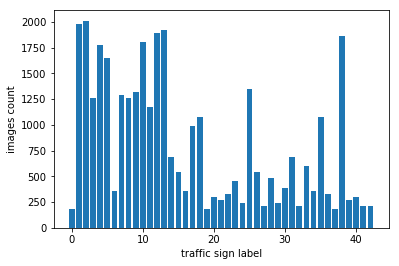

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

unique, counts = np.unique(y_train, return_counts=True)
plt.figure(1)
plt.bar(unique, counts)
plt.xlabel('traffic sign label')
plt.ylabel('images count')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
from numpy import random

def single_image_augmentation(img, intensity):
    """
    This function receive one original image and randomly generate one new image based on given intensity
    Args:
        img: input image
        intensity: intensity of rotation and projective transform
    Returns:
        img: output image
    Raises:
    """

    img = rotate_img(img, intensity)
    img = projective_transform(img, intensity)

    return img

def rotate_img(img, intensity):
    delta = 30. * intensity 
    img = rotate(img, random.uniform(-delta, delta), mode='edge')
    return img

def projective_transform(img, intensity):
    #print(img.dtype)
    #print(np.max(img))
    #print(np.min(img))
    image_x_size = img.shape[0]
    image_y_size = img.shape[1]

    dx = image_x_size * 0.3 * intensity
    dy = image_y_size * 0.3 * intensity

    tl_top = random.uniform(-dy, dy)
    tl_left = random.uniform(-dx, dx)
    bl_bottom = random.uniform(-dy, dy)
    bl_left = random.uniform(-dx, dx)
    tr_top = random.uniform(-dy, dy)
    tr_right = random.uniform(-dx, dx)
    br_bottom = random.uniform(-dy, dy)
    br_right = random.uniform(-dx, dx)

    transform = ProjectiveTransform()
            
    transform.estimate(
        np.array((
            (tl_left, tl_top),
            (bl_left, image_x_size - bl_bottom),
            (image_y_size - br_right, image_x_size - br_bottom),
            (image_y_size - tr_right, tr_top))),
        np.array((
            (0, 0),
            (0, image_x_size),
            (image_y_size, image_x_size),
            (image_y_size, 0))))    

    img = warp(img, transform, mode='edge')
    img = (img * 255).astype(np.uint8)
    #print(img.dtype)
    #print(np.max(img))
    #print(np.min(img))
    return img

def data_augmentation(X_train, y_train, target):
    """
    This function receive training dataset X_train and labels y_train. 
    Args:
		X_train: Training dataset
		y_train: Training dataset labels
		target: Target number of training data for each label
    Returns:
        ret_X_train: New training dataset after data augmentation
		ret_y_train: New training dataset labels after data augmentation
    Raises:
    """
    
    labels, counts = np.unique(y_train, return_counts=True)
    
    X_aug = []
    y_aug = []
    
    for label, count in zip(labels, counts):
        augmentation_num = target - count
        X_train_label = X_train[y_train == label]

        for i in range(augmentation_num):
            # pick a random image from X_train_label
            img = X_train_label[np.random.randint(count)]
            # image augmentation
            intensity = 0.75
            img = single_image_augmentation(img, intensity)
            
            X_aug.append(img)
            y_aug.append(label)
    
    # Append new data to X_train.    
    ret_X_train = np.concatenate((X_train, np.array(X_aug)), axis=0)
    ret_y_train = np.concatenate((y_train, np.array(y_aug)), axis=0)

    return ret_X_train, ret_y_train

def data_normalization(X_train, y_train):
    """
    Args:
        X_train: input images
        y_train: input labels
    Returns:
        ret_X_train: output images
        ret_y_train: output labels
    Raises:
    """
    
    ret_X_train = (X_train.astype(float) - 128) / 256
    ret_y_train = y_train
    
    return ret_X_train, ret_y_train

def data_preprocessing(X_train, y_train, is_shuffle=True):
    """
    This function convert all input images into grayscale, then apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to enhance traffic sign feature.
    Args:
        X_train: input images
        y_train: input labels
    Returns:
        X_train: output images
        y_train: output labels
    Raises:
    """

    tmp_X_train = []
    
    for i in range(X_train.shape[0]):
        img = X_train[i]
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)
        tmp_X_train.append(img[:,:,np.newaxis])
    
    X_train = np.array(tmp_X_train)

    X_train, y_train = data_normalization(X_train, y_train)

    if is_shuffle:
        X_train, y_train = shuffle(X_train, y_train)

    return X_train, y_train

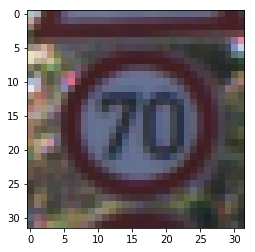

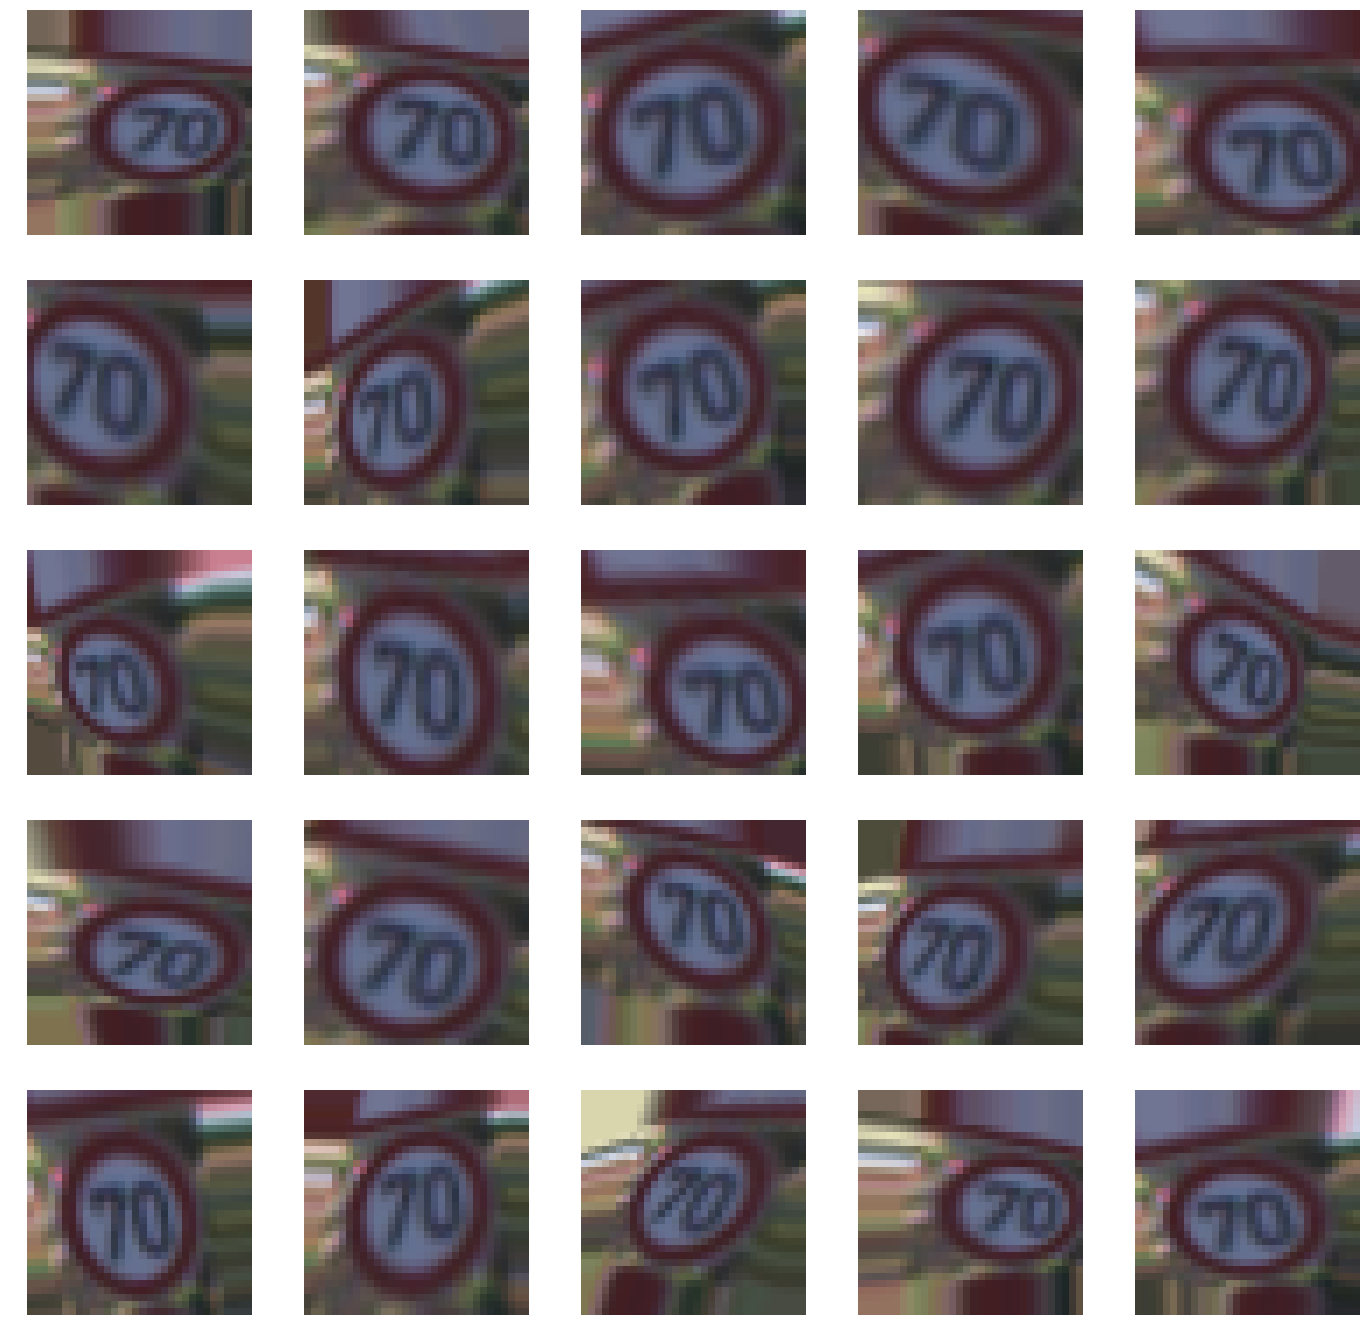

In [5]:
# Test_X, Test_y = data_augmentation(X_train, y_train, 5000)

# unique, counts = np.unique(Test_y, return_counts=True)
# plt.figure(1)
# plt.bar(unique, counts)
# plt.xlabel('traffic sign label')
# plt.ylabel('images count')


# image = X_train[265]
# plt.imshow(image)

# import matplotlib.gridspec as gridspec

# gs1 = gridspec.GridSpec(10, 10)
# gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
# plt.figure(figsize=(12,12))
# for i in range(100):
#     ax1 = plt.subplot(gs1[i])
#     ax1.set_xticklabels([])
#     ax1.set_yticklabels([])
#     ax1.set_aspect('equal')
#     img = single_image_augmentation(image,20,5,10)

#     plt.subplot(10,10,i+1)
#     plt.imshow(img)
#     plt.axis('off')

# plt.show()




#image = X_train[7456]
image = X_train[7456]
plt.imshow(image)

import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(5, 5)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(24,24))
for i in range(25):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    intensity = 0.75
    img = single_image_augmentation(image, intensity)

    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

#plt.imshow(image)

# import matplotlib.gridspec as gridspec

# gs1 = gridspec.GridSpec(43, 10)
# gs1.update(wspace=0.00, hspace=0.00) # set the spacing between axes. 

# plt.figure(figsize=(12,12))
# labels = np.unique(y_train)

# for idx, label in enumerate(labels):
#     X_train_label = X_train[y_train == label]
#     for i in range(10):
#         # pick a random image from X_train_label
#         count = X_train_label.shape[0]
#         img = X_train_label[np.random.randint(count)]
        
#         ax1 = plt.subplot(gs1[i])
#         ax1.set_xticklabels([])
#         ax1.set_yticklabels([])
#         #ax1.set_aspect('auto')
#         plt.subplot(43, 10, idx*10 + i+1)
#         plt.imshow(img)
#         plt.axis('off')

# plt.show()


# import matplotlib.gridspec as gridspec

# fig = plt.figure(figsize=(100,860))
# labels = np.unique(y_train)

# for idx, label in enumerate(labels):
#     X_train_label = X_train[y_train == label]
#     for i in range(5):
#         # pick a random image from X_train_label
#         count = X_train_label.shape[0]
#         img = X_train_label[np.random.randint(count)]
        
#         a = fig.add_subplot(43, 5, idx*5+i+1)
#         imgplot = plt.imshow(img)
#         #imgplot.set_clim(0.0, 0.7)
        
# plt.show()



### Model Architecture

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.utils import shuffle

def fc(input, 
       in_dim, 
       out_dim, 
       activation=tf.nn.relu, 
       l2_reg_const=0.0,
       isTraining=True):
    
#     n_inputs = int(input.get_shape()[1])
#     norm_mean = 0.0
#     norm_stddev = 2 / np.sqrt(n_inputs)
    
    fc_W = tf.get_variable('weights',
                           (in_dim, out_dim),
                           #initializer=tf.contrib.layers.variance_scaling_initializer(),
                           #initializer=tf.truncated_normal_initializer(norm_mean, norm_stddev),
                           initializer=tf.contrib.layers.xavier_initializer(),
                           regularizer=tf.contrib.layers.l2_regularizer(l2_reg_const))
    variable_summaries(fc_W)
    
    # fc_b = tf.get_variable('biases',
                           # (out_dim),
                           # initializer=tf.zeros_initializer())
    # variable_summaries(fc_b)
    
    # fc = tf.nn.xw_plus_b(input, fc_W, fc_b)
    
    fc = tf.matmul(input, fc_W)
    tf.summary.histogram('pre_activations', fc)
    
    fc = tf.contrib.layers.batch_norm(fc, 
                                      center=True, 
                                      scale=True, 
                                      is_training=isTraining)
    
    if activation is not None:
        fc = activation(fc)
        tf.summary.histogram('activations', fc)
    
    return fc

def conv2d(input,
           filter_shape,
           strides=[1, 1, 1, 1], 
           padding='SAME',
           activation=tf.nn.relu, 
           l2_reg_const=0.0,
           isTraining=True):
    
#     n_inputs = int(input.get_shape()[1])
#     norm_mean = 0.0
#     norm_stddev = 2 / np.sqrt(n_inputs)
    
    filter = tf.get_variable('filters',
                             filter_shape,
                             #initializer=tf.contrib.layers.variance_scaling_initializer(),
                             initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                             #initializer=tf.truncated_normal_initializer(norm_mean, norm_stddev),
                             regularizer=tf.contrib.layers.l2_regularizer(l2_reg_const))
    variable_summaries(filter)
    
    biases = tf.get_variable('biases',
                             (filter_shape[3]),
                             initializer=tf.zeros_initializer())
    variable_summaries(biases)

    conv2d = tf.nn.conv2d(input, filter, strides=strides, padding=padding)
    conv2d = tf.nn.bias_add(conv2d, biases)
    

#     conv2d = tf.contrib.layers.batch_norm(conv2d, 
#                                           center=True, 
#                                           scale=True, 
#                                           is_training=isTraining,
#                                           scope='bn')
    
    if activation is not None:
        conv2d = activation(conv2d)
        tf.summary.histogram('activation', conv2d)
    
    return conv2d

def inception_module(input, 
                     in_channels, 
                     filter_count,
                     l2_reg_const=0.0,
                     isTraining=True):
    
    # Branch 1x1 : 1x1 conv
    with tf.variable_scope("1x1_branch"):
        with tf.variable_scope("1x1_conv2d"):
            branch1x1 = conv2d(input,
                               (1, 1, in_channels, filter_count), 
                               l2_reg_const=l2_reg_const, 
                               isTraining=isTraining)
        
    # Branch 3x3 : 1x1 -> 3x3
    with tf.variable_scope("1x1_3x3_branch"):        
        with tf.variable_scope("1x1_conv2d"):
            branch3x3 = conv2d(input, 
                               (1, 1, in_channels, 1), 
                               l2_reg_const=l2_reg_const,
                               isTraining=isTraining)
            
        with tf.variable_scope("3x3_conv2d"):
            branch3x3 = conv2d(branch3x3, 
                               (3, 3, 1, filter_count), 
                               l2_reg_const=l2_reg_const,
                               isTraining=isTraining)
    
    # Branch 5x5 : 1x1 -> 5x5
    with tf.variable_scope("1x1_5x5_branch"):
        with tf.variable_scope("1x1_conv2d"):
            branch5x5 = conv2d(input, 
                               (1, 1, in_channels, 1), 
                               l2_reg_const=l2_reg_const, 
                               isTraining=isTraining)
            
        with tf.variable_scope("5x5_conv2d"):
            branch5x5 = conv2d(branch5x5, 
                               (5, 5, 1, filter_count), 
                               l2_reg_const=l2_reg_const, 
                               isTraining=isTraining)

    # Branch max pool : 3x3 max pooling -> 1x1
    with tf.variable_scope("max_pool_1x1_branch"):
        with tf.variable_scope("max_pool"):
            branch_pool = tf.nn.max_pool(input, 
                                         ksize=[1, 3, 3, 1], 
                                         strides=[1, 1, 1, 1], 
                                         padding='SAME')
            
        with tf.variable_scope("1x1_conv2d"):
            branch_pool = conv2d(branch_pool, 
                                 (1, 1, in_channels, filter_count), 
                                 l2_reg_const=l2_reg_const, 
                                 isTraining=isTraining)
    
    inception_module = tf.concat(axis=3, 
                                 values=[branch1x1, 
                                         branch3x3, 
                                         branch5x5, 
                                         branch_pool])
    
    return inception_module

def inception_module_v4(input, 
                        in_channels, 
                        filter_count,
                        hidden_filter_count=3,
                        l2_reg_const=0.0, 
                        isTraining=True):
    
    # Branch 1x1 : 1x1 conv
    with tf.variable_scope("1x1_branch"):
        with tf.variable_scope("1x1_conv2d"):
            branch1x1 = conv2d(input, 
                               (1, 1, in_channels, filter_count), 
                               l2_reg_const=l2_reg_const, 
                               isTraining=isTraining)
        
    # Branch 3x3 : 1x1 -> 3x3
    with tf.variable_scope("1x1_3x3_branch"):        
        with tf.variable_scope("1x1_conv2d"):
            branch3x3 = conv2d(input,
                               (1, 1, in_channels, hidden_filter_count),
                               l2_reg_const=l2_reg_const,
                               isTraining=isTraining)
            
        with tf.variable_scope("3x3_conv2d"):
            branch3x3 = conv2d(branch3x3, 
                               (3, 3, hidden_filter_count, filter_count), 
                               l2_reg_const=l2_reg_const,
                               isTraining=isTraining)
    
    # Branch 3x3dbl : 1x1 -> 3x3 -> 3x3
    with tf.variable_scope("1x1_3x3_3x3_branch"):
        with tf.variable_scope("1x1_conv2d"):
            branch3x3dbl = conv2d(input, 
                                  (1, 1, in_channels, hidden_filter_count), 
                                  l2_reg_const=l2_reg_const, 
                                  isTraining=isTraining)
            
        with tf.variable_scope("3x3_conv2d_1"):
            branch3x3dbl = conv2d(branch3x3dbl, 
                                  (3, 3, hidden_filter_count, hidden_filter_count), 
                                  l2_reg_const=l2_reg_const,
                                  isTraining=isTraining)
            
        with tf.variable_scope("3x3_conv2d_2"):
            branch3x3dbl = conv2d(branch3x3dbl, 
                                  (3, 3, hidden_filter_count, filter_count), 
                                  l2_reg_const=l2_reg_const,
                                  isTraining=isTraining)

    # Branch max pool : 3x3 max pooling -> 1x1
    with tf.variable_scope("max_pool_1x1_branch"):
        with tf.variable_scope("max_pool"):
            branch_pool = tf.nn.max_pool(input, 
                                         ksize=[1, 3, 3, 1], 
                                         strides=[1, 1, 1, 1], 
                                         padding='SAME')
            
        with tf.variable_scope("1x1_conv2d"):
            branch_pool = conv2d(branch_pool, 
                                 (1, 1, in_channels, filter_count), 
                                 l2_reg_const=l2_reg_const,
                                 isTraining=isTraining)
    
    inception_module = tf.concat(axis=3, 
                                 values=[branch1x1, 
                                         branch3x3, 
                                         branch3x3dbl, 
                                         branch_pool])
    
    return inception_module
    
def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

In [15]:
def convNet(input, keep_prob, l2_reg_const, isTraining):
    
    # 32x32x1 -> 32x32x7
    with tf.variable_scope("conv2d_1"):
        with tf.variable_scope("conv2d_1"):
            conv2d_1 = conv2d(input, 
                              filter_shape=(3, 3, 1, 3),
                              strides=[1, 1, 1, 1],
                              padding='SAME',
                              l2_reg_const=l2_reg_const, 
                              isTraining=isTraining)
            
        with tf.variable_scope("conv2d_2"):
            conv2d_1 = conv2d(conv2d_1, 
                              filter_shape=(3, 3, 3, 6),
                              strides=[1, 1, 1, 1],
                              padding='SAME',
                              l2_reg_const=l2_reg_const, 
                              isTraining=isTraining)
        
        conv2d_1 = tf.concat(axis=3, values=[conv2d_1, input])
        
    # 32x32x7 -> 16x16x7
    with tf.variable_scope("max_pool_1"):    
        max_pool_1 = tf.nn.max_pool(conv2d_1,
                                    ksize=[1, 2, 2, 1],
                                    strides=[1, 2, 2, 1],
                                    padding='SAME')
        #max_pool_1 = tf.nn.dropout(max_pool_1, 0.3)
        
    # 16x16x7 -> 16x16x[16+7]23
    with tf.variable_scope("conv2d_2"):
        with tf.variable_scope("conv2d_1"):
            conv2d_2 = conv2d(max_pool_1, 
                              filter_shape=(4, 4, 7, 8),
                              strides=[1, 1, 1, 1],
                              padding='SAME',
                              l2_reg_const=l2_reg_const, 
                              isTraining=isTraining)
        
        with tf.variable_scope("conv2d_2"):
            conv2d_2 = conv2d(conv2d_2, 
                              filter_shape=(4, 4, 8, 16),
                              strides=[1, 1, 1, 1],
                              padding='SAME',
                              l2_reg_const=l2_reg_const, 
                              isTraining=isTraining)
        
        conv2d_2 = tf.concat(axis=3, values=[conv2d_2, max_pool_1])
        
    # 16x16x23 -> 8x8x23
    with tf.variable_scope("max_pool_2"):    
        max_pool_2 = tf.nn.max_pool(conv2d_2,
                                  ksize=[1, 2, 2, 1],
                                  strides=[1, 2, 2, 1],
                                  padding='SAME')
        #max_pool_2 = tf.nn.dropout(max_pool_2, 0.3)
        
    # 8x8x23 -> 8x8x[32+23]
    with tf.variable_scope("conv2d_3"):
        conv2d_3 = conv2d(max_pool_2, 
                          filter_shape=(3, 3, 23, 32),
                          strides=[1, 1, 1, 1],
                          padding='SAME',
                          l2_reg_const=l2_reg_const, 
                          isTraining=isTraining)
                          
        conv2d_3 = tf.concat(axis=3, values=[conv2d_3, max_pool_2])
        
    # 8x8x55 -> 4x4x55
    with tf.variable_scope("max_pool_3"):    
        max_pool_3 = tf.nn.max_pool(conv2d_3,
                                  ksize=[1, 2, 2, 1],
                                  strides=[1, 2, 2, 1],
                                  padding='SAME')
        #max_pool_3 = tf.nn.dropout(max_pool_3, 0.3)
    
    
    # 3x3x55 -> 1x1x55
    with tf.variable_scope("conv2d_4"):
        conv2d_4 = conv2d(max_pool_3, 
                          filter_shape=(3, 3, 55, 128),
                          strides=[1, 1, 1, 1],
                          padding='VALID',
                          l2_reg_const=l2_reg_const, 
                          isTraining=isTraining)
        
    # Flatten. 14x14x4=784
    with tf.variable_scope("fc0"):
        fc0 = tf.contrib.layers.flatten(conv2d_4)
    
    # Fully Connected. Input = 784. Output = 384.
    with tf.variable_scope("fc1"):
        fc1 = fc(fc0, 512, 1024, 
                 l2_reg_const=l2_reg_const, 
                 isTraining=isTraining)
        
        fc1 = tf.nn.dropout(fc1, keep_prob)
        
    # Fully Connected. Input = 128. Output = output_n_classes.
    with tf.variable_scope("fc2"):
        logits = fc(fc1, 1024, 43, 
                    activation=None, 
                    l2_reg_const=l2_reg_const, 
                    isTraining=isTraining)
        
        logits = tf.nn.dropout(logits, keep_prob)

    
    return logits


def LeNet(x):
    
    mean = 0.0
    stddev = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mean, stddev = stddev))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mean, stddev = stddev))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mean, stddev = stddev))
    fc1_b = tf.Variable(tf.zeros(120))
    
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mean, stddev = stddev))
    fc2_b = tf.Variable(tf.zeros(84))
    
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = output_n_classes.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mean, stddev = stddev))
    fc3_b = tf.Variable(tf.zeros(43))
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
l2_reg_const = tf.placeholder(tf.float32)
phase = tf.placeholder(tf.bool, name='phase')
one_hot_y = tf.one_hot(y, 43)
 
# Training params
model=convNet
learning_rate=0.0005
data_augmentation_target=3000
dropout_keep_prob=0.75
EPOCHS=100
BATCH_SIZE=128
l2_reg_const_param=1e-4

# Params for restore and continue training
restore_path=None
initial_EPOCH=0

#logits = LeNet(x)
#logits = LeNetWithDropout(x, keep_prob, l2_reg_const, phase)
#logits = InceptionV3(x, keep_prob, l2_reg_const, phase)
logits = model(x, keep_prob, l2_reg_const, phase)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# add regularization
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss_operation = loss_operation + tf.add_n(reg_losses)

# For batch normalization
update_operation = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

with tf.control_dependencies(update_operation):
    training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, l2_reg_const_param=0.0, isTraining=False):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    losses = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, 
                                                                                   y: batch_y, 
                                                                                   keep_prob: 1.0, 
                                                                                   l2_reg_const: l2_reg_const_param, 
                                                                                   phase: isTraining})
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples), (total_loss / num_examples)

Training Hyperparameters:
model=convNet
learning_rate=0.0005
data_augmentation_target=3000
dropout_keep_prob=0.75
l2_reg_const_param=0.0001
EPOCHS=100
BATCH_SIZE=128

Training...

EPOCH	Valid Loss	Train Loss	Valid Accu	Train Accu
1/100	3.60040012703	3.6604102532	0.205668934234	0.163542635686
2/100	3.43358666037	3.55083586617	0.184807256128	0.127496124042
3/100	2.93972326114	3.13833572505	0.393650793556	0.292643410875
4/100	1.82805059524	2.14458332254	0.840816326855	0.743844961277
5/100	0.94411241946	1.22419433784	0.925850339379	0.870682170572
6/100	0.63281196937	0.861553437122	0.936734693121	0.882372093064
7/100	0.495858902077	0.653813407355	0.937641722329	0.902906976811
8/100	0.359466574684	0.534176500119	0.943310657623	0.912209302366
9/100	0.322888460451	0.448579145213	0.949433106846	0.918705426408
10/100	0.281344927844	0.397062698479	0.957142856386	0.935682170532
11/100	0.308092175779	0.397176187963	0.957142856629	0.940170542665


KeyboardInterrupt: 

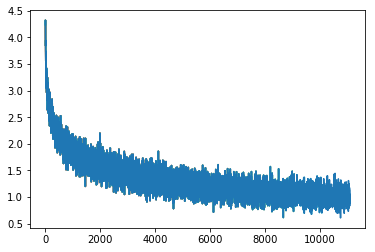

In [9]:
with tf.Session() as sess:
    train_writer = tf.summary.FileWriter('./train',
                                         sess.graph)
    test_writer = tf.summary.FileWriter('./test')
    
    sess.run(tf.global_variables_initializer())
    
    if restore_path is not None:
        saver.restore(sess, restore_path)
    
    print("Training Hyperparameters:")
    print("model="+str(model.__name__)+"")
    print("learning_rate="+str(learning_rate)+"")
    print("data_augmentation_target="+str(data_augmentation_target)+"")
    print("dropout_keep_prob="+str(dropout_keep_prob)+"")
    print("l2_reg_const_param="+str(l2_reg_const_param)+"")
    print("EPOCHS="+str(EPOCHS)+"")
    print("BATCH_SIZE="+str(BATCH_SIZE)+"")
    print()
    print("Training...")
    print()
    print("EPOCH", "Valid Loss", "Train Loss", "Valid Accu", "Train Accu", sep='\t')
    
    # Output loss
    loss_values = []
    
    # Data pre-processing for validation dataset
    pre_X_valid, pre_y_valid = data_preprocessing(X_valid, y_valid)
    
    for i in range(initial_EPOCH, EPOCHS):
        # data augmentation for each EPOCH
        augmented_X_train, augmented_y_train = data_augmentation(X_train, 
                                                                 y_train, 
                                                                 data_augmentation_target)

        pre_X_train, pre_y_train = data_preprocessing(augmented_X_train, augmented_y_train)
        num_examples = len(pre_X_train)
                
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = pre_X_train[offset:end], pre_y_train[offset:end]
            _, loss_value = sess.run([training_operation, loss_operation], 
                                     feed_dict={x: batch_x, 
                                                y: batch_y, 
                                                keep_prob: dropout_keep_prob, 
                                                l2_reg_const: l2_reg_const_param, 
                                                phase: True})
            
            loss_values.append(loss_value)
        
        plt.close('all')
        plt.figure()
        plt.plot(loss_values)
        plt.savefig('./Loss.png')
        #plt.show()
                
        validation_accuracy, valid_loss = evaluate(pre_X_valid, 
                                                   pre_y_valid, 
                                                   l2_reg_const_param=l2_reg_const_param, 
                                                   isTraining=False)
        
        training_accuracy, train_loss = evaluate(pre_X_train, 
                                                  pre_y_train, 
                                                  l2_reg_const_param=l2_reg_const_param, 
                                                  isTraining=False)
        
        print(str(i+1)+"/"+str(EPOCHS),str(valid_loss), str(train_loss), str(validation_accuracy), str(training_accuracy), sep='\t')
        
        #if (i != 0 and i % 10 == 0):
        saver.save(sess, './ConvNet', global_step=i)
        
            
    saver.save(sess, './ConvNet')
    print("Model saved (step={})".format(i))

In [19]:
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, phase: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

pre_X_test, pre_y_test = data_preprocessing(X_test, y_test)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './Best_Solution')
    validation_accuracy = evaluate(pre_X_test, pre_y_test)
    
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

INFO:tensorflow:Restoring parameters from ./Best_Solution
Validation Accuracy = 0.964


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

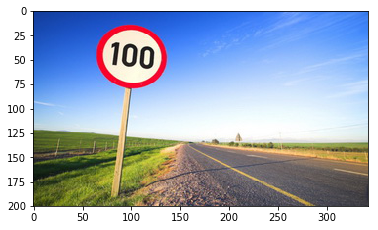

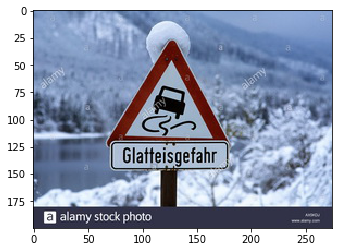

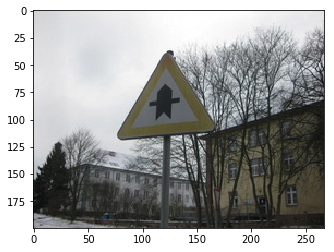

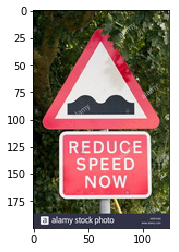

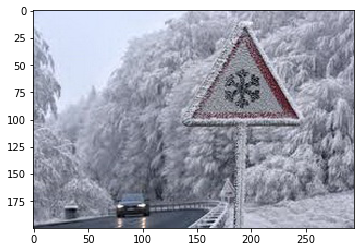

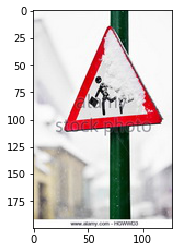

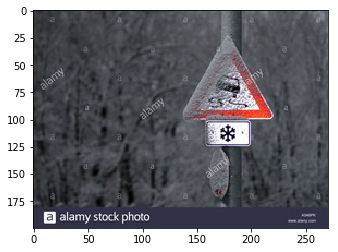

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

web_images_list = ['./pics/web1.jpg',
                   './pics/web2.jpg',
                   './pics/web3.jpg',
                   './pics/web4.jpg',
                   './pics/web5.jpg',
                   './pics/web6.jpg',
                   './pics/web7.jpg']

for img_path in web_images_list:
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.show()

### Predict the Sign Type for Each Image

In [26]:
sign_name_dict = {0:'Speed limit (20km/h)',
        1:'Speed limit (30km/h)',
        2:'Speed limit (50km/h)',
        3:'Speed limit (60km/h)',
        4:'Speed limit (70km/h)',
        5:'Speed limit (80km/h)',
        6:'End of speed limit (80km/h)',
        7:'Speed limit (100km/h)',
        8:'Speed limit (120km/h)',
        9:'No passing',
        10:'No passing for vehicles over 3.5 metric tons',
        11:'Right-of-way at the next intersection',
        12:'Priority road',
        13:'Yield',
        14:'Stop',
        15:'No vehicles',
        16:'Vehicles over 3.5 metric tons prohibited',
        17:'No entry',
        18:'General caution',
        19:'Dangerous curve to the left',
        20:'Dangerous curve to the right',
        21:'Double curve',
        22:'Bumpy road',
        23:'Slippery road',
        24:'Road narrows on the right',
        25:'Road work',
        26:'Traffic signals',
        27:'Pedestrians',
        28:'Children crossing',
        29:'Bicycles crossing',
        30:'Beware of ice/snow',
        31:'Wild animals crossing',
        32:'End of all speed and passing limits',
        33:'Turn right ahead',
        34:'Turn left ahead',
        35:'Ahead only',
        36:'Go straight or right',
        37:'Go straight or left',
        38:'Keep right',
        39:'Keep left',
        40:'Roundabout mandatory',
        41:'End of no passing',
        42:'End of no passing by vehicles over 3.5 metric tons'}

        
sign_name_dict_short = {0:'Speed limit (20km/h)',
        1:'Speed limit\n(30km/h)',
        2:'Speed limit\n(50km/h)',
        3:'Speed limit\n(60km/h)',
        4:'Speed limit\n(70km/h)',
        5:'Speed limit\n(80km/h)',
        6:'End of speed\nlimit (80km/h)',
        7:'Speed limit\n(100km/h)',
        8:'Speed limit\n(120km/h)',
        9:'No passing',
        10:'No passing for\nvehicles over\n3.5 metric tons',
        11:'Right-of-way\nat the next\nintersection',
        12:'Priority road',
        13:'Yield',
        14:'Stop',
        15:'No vehicles',
        16:'Vehicles over\n3.5 metric tons prohibited',
        17:'No entry',
        18:'General caution',
        19:'Dangerous curve\nto the left',
        20:'Dangerous curve\nto the right',
        21:'Double curve',
        22:'Bumpy road',
        23:'Slippery road',
        24:'Road narrows\non the right',
        25:'Road work',
        26:'Traffic signals',
        27:'Pedestrians',
        28:'Children\ncrossing',
        29:'Bicycles\ncrossing',
        30:'Beware of\nice/snow',
        31:'Wild animals\ncrossing',
        32:'End of all speed\nand passing limits',
        33:'Turn right\nahead',
        34:'Turn left\nahead',
        35:'Ahead only',
        36:'Go straight\nor right',
        37:'Go straight\nor left',
        38:'Keep right',
        39:'Keep left',
        40:'Roundabout\nmandatory',
        41:'End of\nno passing',
        42:'End of\nno passing by\nvehicles over\n3.5 metric tons'}


INFO:tensorflow:Restoring parameters from ./Best_Solution
image Speed limit (100km/h)


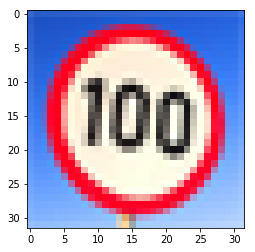

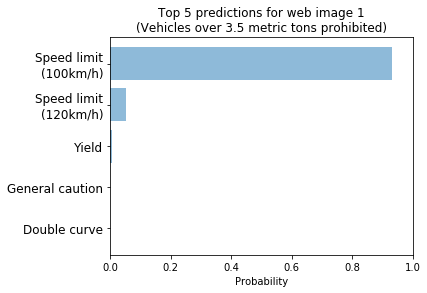

[0.0007870908, 0.00081724615, 0.0061781886, 0.053623158, 0.93032134]
image Slippery road


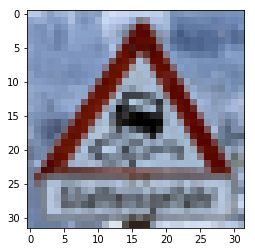

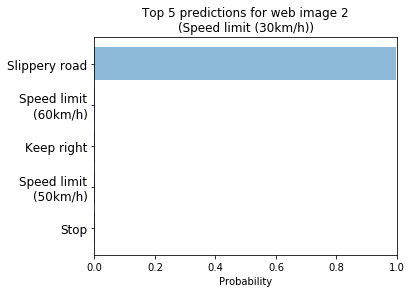

[0.00045188997, 0.00064729201, 0.00074573007, 0.00076103688, 0.99614918]
image Right-of-way at the next intersection


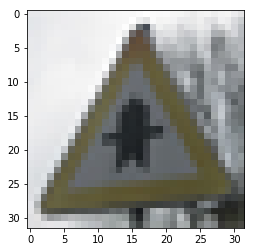

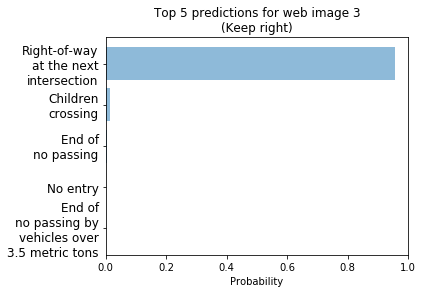

[0.0018897573, 0.0022343157, 0.0053152349, 0.015523721, 0.95622325]
image Bumpy road


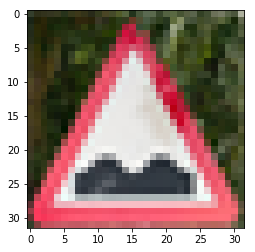

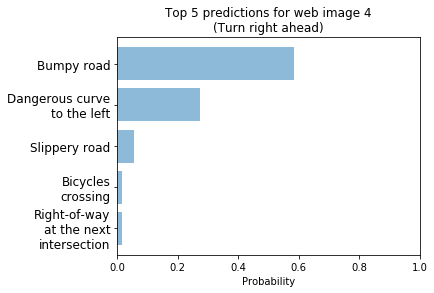

[0.014535689, 0.016636984, 0.054442178, 0.27490991, 0.58385968]
image Beware of ice/snow


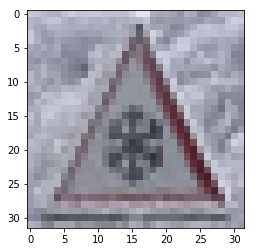

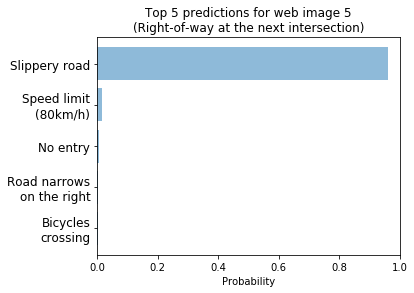

[0.0026038468, 0.0028794443, 0.0043785879, 0.014085745, 0.96127099]
image Children crossing


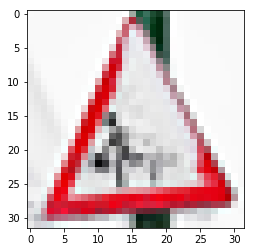

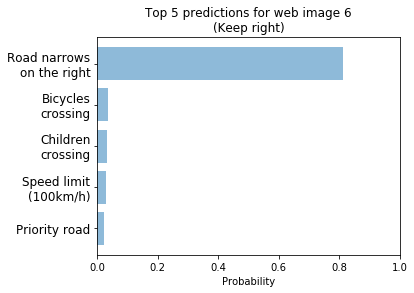

[0.021188168, 0.029123783, 0.033629205, 0.035533819, 0.81097865]
image Slippery road


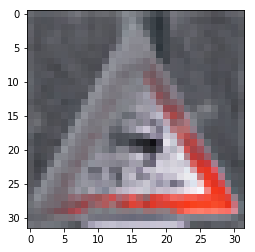

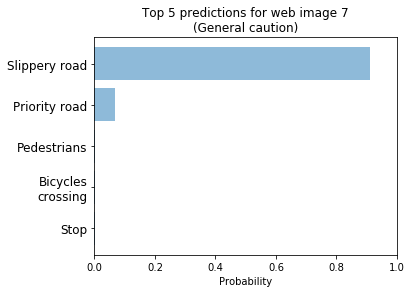

[0.0025458478, 0.0029979357, 0.0030066886, 0.069231011, 0.91174716]


In [40]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

model_path = './Best_Solution'
model = convNet

test_list = ['./web_images/test1.png',
             './web_images/test2.png',
             './web_images/test3.png',
             './web_images/test4.png',
             './web_images/test5.png',
             './web_images/test6.png',
             './web_images/test7.png']
        
labels = [7,
         23,
         11,
         22,
         30,
         28,
         23]

X_web = []
y_web = []
count = 0

for img_path in test_list:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_web.append(img)
    y_web.append(labels[count])
    count += 1

X_web = np.array(X_web)

# Pre-processing for images
pre_X_web, pre_y_web = data_preprocessing(X_web, y_web, is_shuffle=False)

tf.reset_default_graph()

# Define model 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
l2_reg_const = tf.placeholder(tf.float32)
phase = tf.placeholder(tf.bool, name='phase')
one_hot_y = tf.one_hot(y, 43)


logits = model(x, keep_prob, l2_reg_const, phase)
prediction_prob = tf.nn.softmax(logits=logits)
    
def evaluate(X_data, restore_path, l2_reg_const_param=0.0, isTraining=False):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
    
        sess.run(tf.global_variables_initializer())
        
        saver.restore(sess, restore_path)
    
        probs = sess.run([prediction_prob], 
                        feed_dict={x: X_data, 
                                   keep_prob: 1.0, 
                                   l2_reg_const: l2_reg_const_param, 
                                   phase: isTraining})

    return probs

# './debug/m=convNet2 lr=0.0005 do=0.75 l2=0.0001/Best_Solution'
probs = evaluate(pre_X_web, model_path)

probs = probs[0]

for i in range(len(test_list)):
    print("image " + sign_name_dict[y_web[i]])
    prob = probs[i]
    top5_idx = prob.argsort()[-5:][::-1]
    
    top5_prob = []
    signs = []
    
    for idx in top5_idx:
        top5_prob.append(prob[idx])
        signs.append(sign_name_dict_short[idx])
        
    top5_prob.reverse()
    signs.reverse()
    
    y_pos = np.arange(len(signs))
    
    plt.imshow(X_web[i])
    plt.show()
    
    plt.close("all")
    fig, ax = plt.subplots(1,1)
    ax.barh(y_pos, top5_prob, align='center', alpha=0.5)
    plt.yticks(y_pos, signs, size=12)
    plt.xlabel('Probability')
    plt.title('Top 5 predictions for web image ' + str(i + 1) + '\n(' + sign_name_dict[y_test[i]] + ')')
    plt.xlim([0.0, 1.0])
    fig.subplots_adjust(left = 0.2)
    
    #plt.savefig('./predict_'+str(i+1)+'.png')
    plt.show()
    
    print(top5_prob)

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")